# 1. Digital Signal Processing (DSP) - Sampling
_author: Maurice Snoeren_ <br>
_date: 10-04-2021_

This Jupyter notebook is used to practice with the DSP theory in software.Within this course we take time serie signals and perform linear time invariant filtering.

## Sampling real signals
Analog signals are transerred to the digital domain using sampling. When we have a analog signat $f(t)$, we can define it as follows:

$f(t) = ASin(2{\pi}ft + \phi) + b$


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# To be sampled analog signal
A   = 1 # The amplitude
b   = A # The y-axis displacement
f   = 1 #Hz - Frequency of the analog signal
phi = 0 # Phase shift of the analog signal
ts  = 2*1/f # total time to show
dt  = 0.01 # Show analog signal in this time interval

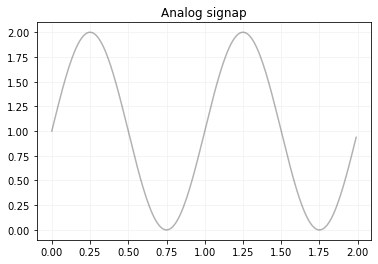

In [2]:
def analog_signal(t, A, b, f, phi):
    return A * np.sin(2 * np.pi * f * t + phi) + b

t1 = []
y1 = []
for x1 in range(int(ts/dt)):
    t1.append(x1*0.01)
    y1.append(analog_signal(t1[x1], A,b, f, phi))
    
plt.plot(t1,  y1, color='black', alpha=0.3)

plt.grid(color='0.95')
plt.title('Analog signap')
plt.show()

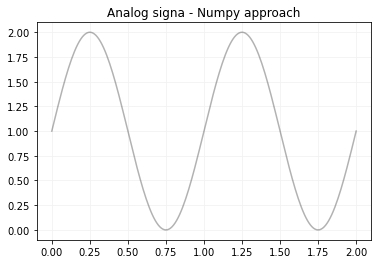

In [3]:
# Using numpy makes it easier!
t2  = np.arange(0, ts+dt, dt)
y2  = A * np.sin(2*np.pi*f*t2 + phi) + b

plt.plot(t2,  y2, color='black', alpha=0.3)

plt.grid(color='0.95')
plt.title('Analog signa - Numpy approach')
plt.show()

Sampling is to take a sample value at a periodic time interval $T_s$ [s] an analog signal. We call this the sampling frequency $f_s$ in [Hz], which can be calculated by 

$f_s=\frac{1}{T_s}$

So we can write the time serie $f(t)$ to the digital time serie $f[n]$ as follows

$f[n] = f(nT_s) = f(\frac{n}{f_s})$, where $n \in \mathbb{N}$

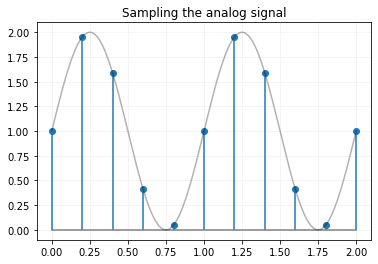

In [4]:
f_s = 5 #Hz - Sampling frequency

t3 = []
y3 = []

for x1 in range(int(f_s*ts+1/f)): # The 1/f to get the last sample of the analog signal
    t3.append(x1/f_s)
    y3.append(analog_signal(t3[x1], A,b, f, phi))
    
plt.stem(t3, y3, '.-', basefmt="gray", use_line_collection=True)
plt.plot(t2,  y2, color='black', alpha=0.3)

plt.grid(color='0.95')
plt.title('Sampling the analog signal')
plt.show()


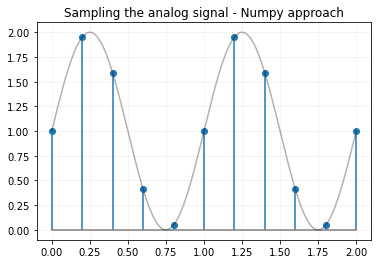

In [5]:
t4 = np.arange(0, ts+1/f_s, 1/f_s)
y4 = A * np.sin(2*np.pi*f*t4 + phi) + b

plt.stem(t4, y4, '.-', basefmt="gray", use_line_collection=True)
plt.plot(t2,  y2, color='black', alpha=0.3)


plt.grid(color='0.95')
plt.title('Sampling the analog signal - Numpy approach')
plt.show()


## Converting the analog value to the digital domain

For now we have found the point of which the analog value should be sampled. In order to read this analog value, we need an Analog to Digital Converter (ADC). This part needs to have some time to convert the analog signal. Therefore, we need a Sample and Hold circuit (S/H), that holds the analog value until the next sample is taken. This looks like the following chart.

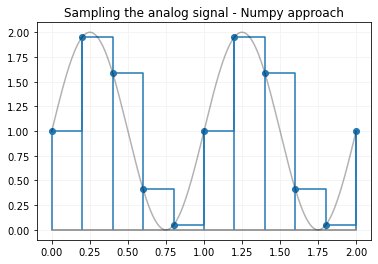

In [6]:
plt.stem(t4, y4, '.-', basefmt="gray", use_line_collection=True)
plt.step(t4, y4, where='post')
plt.plot(t2,  y2, color='black', alpha=0.3)

plt.grid(color='0.95')
plt.title('Sampling the analog signal - Numpy approach')
plt.show()

Transferring the analog value to the digital domain requires quantization of the signal. The quantization depends on the total amount of bits we want to use. Or in some embedded cases the amount of bits could be small due to limited resources. If the have 4 bits we have $2^4$ and therefore 16 possiblities. At the otherside we need to know what represents these bits. In our example, the analog value changes from 0 to 2 Volt. When you have an Ardiuno, the ADC is able to digitize signals from 0 to 5 Volt. In order to fully use the range of the ADC, you need to amplify the analog value with 2.5. At this moment we assume that the range of the ADC is 0 to 2 Volt. We can calculate the total quantization steps $Q$ with

$ Q = 2^{totalbits} - 1 = 2^4 - 1 = 15 $

Than we can calculate how much Volt each step represents with

$ V_{Q} = \frac{U_{adcrange}}{2^{totalbits} - 1}  = \frac{2}{15} = 0.133333 $ [Volt/Q]

At this point we are able to calculate the digital value $D$ that belongs to the analog value $f(t)$ at time $t$

$ D[n] = \frac{f(t)}{V_{Q}} = f(\frac{n}{f_s}) * \frac{2^{totalbits} - 1}{U_{adcrange}} $

When we have the digital value, we are also able to calculate the analog value $f'(t)$

$ f'(\frac{n}{f_s}) = D(n)*V_{Q} = D[n] * \frac{U_{adcrange}}{2^{totalbits} - 1} $

You will see that $f(t)$ and $f'(t)$ will not be the same. The difference between these two is called the quantization error

$ QE = f(t) - f'(t) $

The following python program shows this

,n,f(n/fs),D[n],D[n],f'(n/fs),error
0,0.0,1.000000,7.500000,8.0,1.066667,0.066667
1,1.0,1.951057,14.632924,15.0,2.000000,0.048943
2,2.0,1.587785,11.908389,12.0,1.600000,0.012215
3,3.0,0.412215,3.091611,3.0,0.400000,-0.012215
4,4.0,0.048943,0.367076,0.0,0.000000,-0.048943
5,5.0,1.000000,7.500000,7.0,0.933333,-0.066667
6,6.0,1.951057,14.632924,15.0,2.000000,0.048943
7,7.0,1.587785,11.908389,12.0,1.600000,0.012215
8,8.0,0.412215,3.091611,3.0,0.400000,-0.012215
9,9.0,0.048943,0.367076,0.0,0.000000,-0.048943


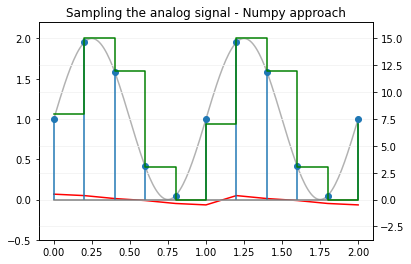

0.4446329256494922


In [7]:
total_bits = 4
Uadcrange  = 2
Q          = 2**total_bits - 1
Vq         = Uadcrange / Q

#f_s = 5 #Hz - Sampling frequency
t  = []
n  = []
Dn = [] #D[n]
Dnr = [] #D[n] rounded 
fa = [] #f(t)
fb = [] #f'(t)
error = [] #QE
for x1 in range(int(f_s*ts+1/f)): # The 1/f to get the last sample of the analog signal
    t.append(x1/f_s)
    n.append(x1);
    fa.append(analog_signal(x1/f_s, A,b, f, phi))
    Dn.append(fa[x1]/Vq)
    Dnr.append(round(Dn[x1]))
    fb.append(Dnr[x1]*Vq)
    error.append(fb[x1] - fa[x1])
    
# Using Pandas to show the values...    
data = [n, fa, Dn, Dnr, fb, error]
display( pd.DataFrame(np.transpose(data), columns=["n", "f(n/fs)", "D[n]", "D[n]", "f'(n/fs)", "error"]) )

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(t2, y2, color='black', alpha=0.3, label='original') # Original signal
plt.stem(t, Dn, '.-', basefmt="gray", use_line_collection=True, label='samples')
ax2.step(t,  Dnr, color='green', where='post', label='digital value')
ax1.plot(t, error, color='red', label='error')

ax1.set_ylim([-Uadcrange/4, 1.1*Uadcrange])
ax2.set_ylim([-Q/4, 1.1*Q])

plt.grid(color='0.95')
plt.title('Sampling the analog signal - Numpy approach')
plt.show()

total_error = np.sum(np.absolute(error))
print(total_error)

The quantization error distorts the actual signal and is called quantization noise. Lowering the total bits will enlarge the quantization noise.

## Question 1.1
Based on the example given previously. Suppose we have an Ardiuno and do not use an amplifier to amplify the input signal to the range of the ADC. So the range of the analog signal is 0 to 2 Volt. The ADC of the Ardiuno is able to convert the range from 0 to 5 Volt to a binary value with also 4 bits. You can use the code of the example. Calculate the values like in the table above for n from 0 till 10. Is the error bigger or smaller? Why should that happen?

,n,f(n/fs),D[n],D[n],f'(n/fs),error
0,0.0,1.000000,3.000000,3.0,1.000000,0.000000e+00
1,1.0,1.951057,5.853170,6.0,2.000000,4.894348e-02
2,2.0,1.587785,4.763356,5.0,1.666667,7.888141e-02
3,3.0,0.412215,1.236644,1.0,0.333333,-7.888141e-02
4,4.0,0.048943,0.146830,0.0,0.000000,-4.894348e-02
5,5.0,1.000000,3.000000,3.0,1.000000,2.220446e-16
6,6.0,1.951057,5.853170,6.0,2.000000,4.894348e-02
7,7.0,1.587785,4.763356,5.0,1.666667,7.888141e-02
8,8.0,0.412215,1.236644,1.0,0.333333,-7.888141e-02
9,9.0,0.048943,0.146830,0.0,0.000000,-4.894348e-02


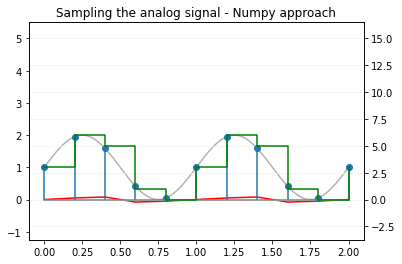

0.5112995923161598


In [8]:
total_bits = 4
Uadcrange  = 5
Q          = 2**total_bits - 1
Vq         = Uadcrange / Q

#f_s = 5 #Hz - Sampling frequency
t  = []
n  = []
Dn = [] #D[n]
Dnr = [] #D[n] rounded 
fa = [] #f(t)
fb = [] #f'(t)
error = [] #QE
for x1 in range(int(f_s*ts+1/f)): # The 1/f to get the last sample of the analog signal
    t.append(x1/f_s)
    n.append(x1);
    fa.append(analog_signal(x1/f_s, A,b, f, phi))
    Dn.append(fa[x1]/Vq)
    Dnr.append(round(Dn[x1]))
    fb.append(Dnr[x1]*Vq)
    error.append(fb[x1] - fa[x1])
    
# Using Pandas to show the values...    
data = [n, fa, Dn, Dnr, fb, error]
display( pd.DataFrame(np.transpose(data), columns=["n", "f(n/fs)", "D[n]", "D[n]", "f'(n/fs)", "error"]) )

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(t2, y2, color='black', alpha=0.3, label='original') # Original signal
plt.stem(t, Dn, '.-', basefmt="gray", use_line_collection=True, label='samples')
ax2.step(t,  Dnr, color='green', where='post', label='digital value')
ax1.plot(t, error, color='red', label='error')

ax1.set_ylim([-Uadcrange/4, 1.1*Uadcrange])
ax2.set_ylim([-Q/4, 1.1*Q])

plt.grid(color='0.95')
plt.title('Sampling the analog signal - Numpy approach')
plt.show()

total_error = np.sum(np.absolute(error))
print(total_error)

## Vragen

V. Als je een signaal wilt downsamplen, hoe doe je dat dan?
A. Digitaal Anti-Aliasing filter gebruiken en naarna de samples the pakken.
O. Maak de methode read-adc compleet en downsample het signaal met de volgende LTI. Deze methode krijgt waarden van een ADC te verwerken. Plot deze waarde en plot ook de waardes die je zou hebben als je geen digitale LTI filter zou gebruiken. Wat is het verschil?

V. How many bits given quantization error
A. ..

V. Assignment 1.1 of the book

V. Explain why we need an anti-aliasing filter

V. Analyseer the frequentie van het gegeven signaal en bepaal de minimale sampling frequency.

V. Gegeven een sampling frequency, wat moet een anti-aliasing filter op filteren?